In [77]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [78]:
# uploading data from the file directory
df = pd.read_csv(r'C:/Users/test/Documents/tochora/dd/Restaurant_Reviews.tsv',delimiter="\t")
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [79]:
# shape of the data
df.shape

(1000, 2)

In [80]:
# checking whether there are non_values in our data
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [81]:
df['Review'].value_counts()

I would not recommend this place.                                                                                                         2
I love this place.                                                                                                                        2
I won't be back.                                                                                                                          2
The food was terrible.                                                                                                                    2
Wow... Loved this place.                                                                                                                  1
                                                                                                                                         ..
The burger... I got the "Gold Standard" a $17 burger and was kind of disappointed.                                                        1
OMG, the food was de

In [82]:
#number of variables in liked column
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

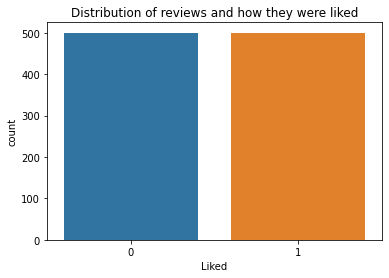

In [98]:
sns.countplot(x=df['Liked'])
plt.title('Distribution of reviews and how they were liked')
plt.show()

In [84]:
#calculate review lengths
review_len = pd.Series(len(review.split()) for review in df['Review'])

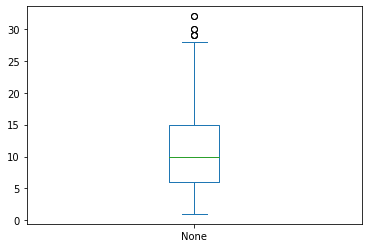

In [85]:
# Distribution of review lenghts by a box plot
review_len.plot(kind='box')
plt.show()

count    500.000000
mean      10.290000
std        5.825958
min        1.000000
25%        6.000000
50%        9.000000
75%       13.250000
max       32.000000
Name: Length, dtype: float64

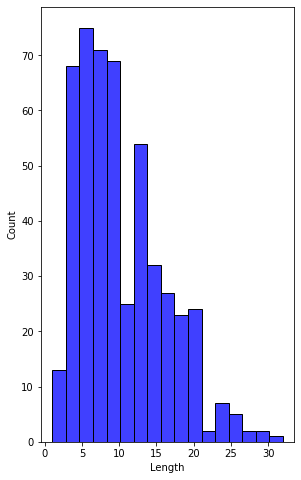

In [86]:
# A display of statistics of column liked and its distribution
fig = plt.figure(figsize=(10,8))
axe = fig.add_subplot(122)
df['Length'] = df.Review.str.split().apply(len)
sns.histplot(df[df['Liked']==1]['Length'], color='blue', ax=axe)
display(df.Length[df['Liked']==1].describe())

count    500.000000
mean      11.498000
std        6.611916
min        2.000000
25%        6.000000
50%       10.000000
75%       16.000000
max       32.000000
Name: Length, dtype: float64

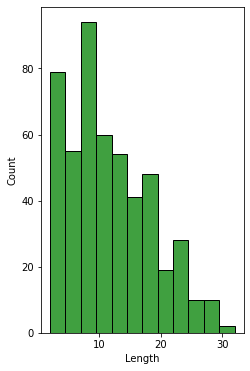

In [87]:
# a display of statistics and distribution of value zero of column liked
fig = plt.figure(figsize=(8,6))
axe = fig.add_subplot(122)
df['Length'] = df.Review.str.split().apply(len)
sns.histplot(df[df['Liked']==0]['Length'],ax=axe, color='green')
display(df.Length[df['Liked']==0].describe())

Text(0.5, 1.0, 'Words relating to reviews liked equaled to zero')

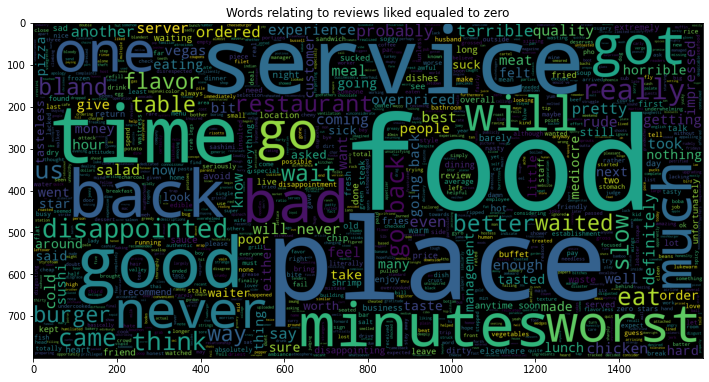

In [106]:
from wordcloud import WordCloud
# a wordcloud showing reviews that are represented by column 'liked' with value one
plt.figure(figsize=(12, 10))
wm = WordCloud(max_words=2000, height=800, width=1600, background_color='black').generate(
    " ".join(df[df['Liked']==0].Review)
)
plt.imshow(wm)
plt.title('Words relating to reviews liked equaled to zero')

Text(0.5, 1.0, 'Words in Reviews represented by liked is equal to one')

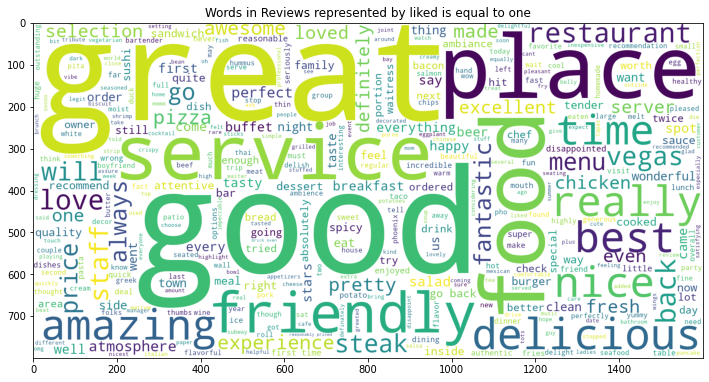

In [105]:
# a wordcloud of reviews that were represented by column 'liked' with value zero
plt.figure(figsize=(12, 10))
wm1 = WordCloud(max_words=2000, min_font_size=10, height=800, width=1600, background_color='white').generate(
    " ".join(df[df['Liked']==1].Review))
plt.imshow(wm1)
plt.title('Words in Reviews represented by liked is equal to one')

In [88]:
# coming up with a fuctin to clean up our text that is Review
def standardize_text(df, field):
    # removing urls
    df[field] = df[field].str.replace(r'http\S+'," ")
    df[field] = df[field].str.replace(r'http'," ")
    df[field] = df[field].str.replace(r'@/S+'," ")
    # removing puctuation  marks
    df[field] = df[field].str.replace(r'[^A-Za-z0-9 (), !?@\'\'\"\_\n]'," ")
    # replasing @ by  at
    df[field] = df[field].str.replace(r'@','at')
    # changing our text from upper case to lower case
    df[field] = df[field].str.lower()
    return df

In [89]:
standardize_text(df, 'Review')

C:\Users\test\AppData\Local\Temp\ipykernel_8436\529864313.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df[field] = df[field].str.replace(r'http\S+'," ")
C:\Users\test\AppData\Local\Temp\ipykernel_8436\529864313.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df[field] = df[field].str.replace(r'@/S+'," ")
C:\Users\test\AppData\Local\Temp\ipykernel_8436\529864313.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df[field] = df[field].str.replace(r'[^A-Za-z0-9 (), !?@\'\'\"\_\n]'," ")


,Review,Liked,Length
0,wow loved this place,1,4
1,crust is not good,0,4
2,not tasty and the texture was just nasty,0,8
3,stopped by during the late may bank holiday of...,1,15
4,the selection on the menu was great and so wer...,1,12
...,...,...,...
995,i think food should have flavor and texture an...,0,12
996,appetite instantly gone,0,3
997,overall i was not impressed and would not go b...,0,10
998,"the whole experience was underwhelming, and i ...",0,16


In [90]:
import re 
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [91]:

lemmatizer = WordNetLemmatizer()
corpus =[]
for i in range(0, len(df)):
    #
    review = re.sub('[^a-zA-Z]', " ", df['Review'][i])
    review = review.split()
    # filtering by removing stopwords in our reviews
    review = [word for word in review if not word in set(stopwords.words('english'))]
    #applying lemmatizer to stem words to their basic form
    review = [lemmatizer.lemmatize(word)for word in review]
    review = " ".join(review)
    corpus.append(review)

In [92]:
corpus[:10]

['wow loved place',
 'crust good',
 'tasty texture nasty',
 'stopped late may bank holiday rick steve recommendation loved',
 'selection menu great price',
 'getting angry want damn pho',
 'honeslty taste fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fry great',
 'great touch']

In [93]:
# importing countvectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
cv = CountVectorizer(max_features=10000)
x = corpus
y = df['Liked']

In [134]:
# training our data
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.20, random_state=18)
# applying countvectorizer to transform words in a text from our dataset into a vector of numbers
x_traincv = cv.fit_transform(x_train)
x_test = cv.transform(x_test)

In [135]:
# modelling our data
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_traincv,y_train)
acc = lr.score(x_test, y_test)
print(acc)
pred = lr.predict(x_test)

0.79


In [110]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       105
           1       0.77      0.79      0.78        95

    accuracy                           0.79       200
   macro avg       0.78      0.79      0.78       200
weighted avg       0.79      0.79      0.79       200



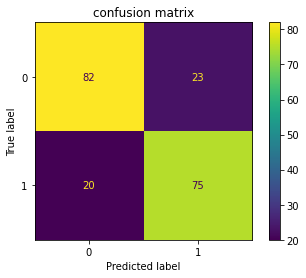

In [111]:
cm = confusion_matrix(pred, y_test, labels=lr.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
display.plot()
plt.title('confusion matrix')
plt.show()

In [115]:
from sklearn.metrics import mean_squared_error,r2_score
print('mean squared error:', mean_squared_error(pred, y_test))
print('r2_score:', r2_score(pred, y_test))

mean squared error: 0.215
r2_score: 0.13784461152882188
